In [185]:
import yfinance as yf
import mplfinance as mpf
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
today = pd.Timestamp(datetime.datetime.now())
print(f"Today is {today}")
#d = today.strftime('%m-%d-%y')
#print(f'date= {d}')


Today is 2023-03-12 16:28:26.084250


In [186]:
def convert_scale(value):
    if value.endswith('M'):
        return float(value[:-1]) * 10**6
    elif value.endswith('B'):
        return float(value[:-1]) * 10**9
    elif value.endswith('T'):
        return float(value[:-1]) * 10**12
    else:
        return float(value)



In [187]:
# reading in from a website
most_active = pd.read_html('https://finance.yahoo.com/most-active')[0]
most_active['PE Ratio (TTM)'] = most_active['PE Ratio (TTM)'].fillna(0)
most_active.dropna(axis=1, thresh=9, inplace=True)
#most_active.set_index('Symbol',inplace=True)
#most_active['Volume', 'Avg Vol (3 month)', 'Market Cap'] = most_active['Volume', 'Avg Vol (3 month)', 'Market Cap'].apply(convert_scale)
most_active.head()
#most_active.info()
#most_active.shape
# dataset has columns that have NaN values
most_active['Volume'] = most_active['Volume'].apply(convert_scale)
most_active['Avg Vol (3 month)'] = most_active['Avg Vol (3 month)'].apply(convert_scale)
most_active['Market Cap'] = most_active['Market Cap'].apply(convert_scale)

most_active.head()
#most_active.info()

,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM)
0,TSLA,"Tesla, Inc.",173.44,0.52,+0.30%,191489000.0,183541000.0,5.487820e+11,50.27
1,BAC,Bank of America Corporation,30.27,-0.27,-0.88%,165331000.0,40376000.0,2.421380e+11,9.58
2,SCHW,The Charles Schwab Corporation,58.70,-7.77,-11.69%,88883000.0,9863000.0,1.073580e+11,19.00
3,SOFI,"SoFi Technologies, Inc.",5.58,-0.51,-8.37%,86810000.0,38149000.0,4.462000e+09,0.00
4,F,Ford Motor Company,12.10,-0.35,-2.81%,73897000.0,63500000.0,4.823300e+10,0.00


array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >], dtype=object)

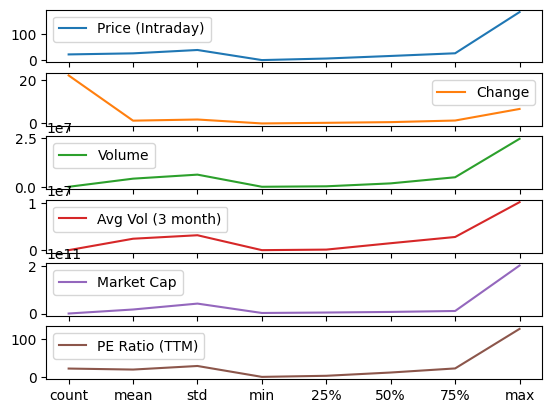

In [188]:
gainers = pd.read_html('https://finance.yahoo.com/gainers')[0]
gainers['PE Ratio (TTM)'] = gainers['PE Ratio (TTM)'].fillna(0)
gainers.dropna(axis=1, thresh=9, inplace=True)
#gainers.set_index('Symbol', inplace=True)
gainers.head()
#gainers.info()
gainers.dtypes
gainers['Volume'] = gainers['Volume'].apply(convert_scale)
gainers['Avg Vol (3 month)'] = gainers['Avg Vol (3 month)'].apply(convert_scale)
gainers['Market Cap'] = gainers['Market Cap'].apply(convert_scale)
gainers.dtypes
gainers.describe().plot(subplots=True)

In [189]:
losers = pd.read_html('https://finance.yahoo.com/losers')[0]
losers['PE Ratio (TTM)'] = losers['PE Ratio (TTM)'].fillna(0)
losers.dropna(axis=1, thresh=9, inplace=True)
#losers.set_index('Symbol',inplace=True)
losers.head()
#losers.info()
losers['Volume'] = losers['Volume'].apply(convert_scale)
losers['Avg Vol (3 month)'] = losers['Avg Vol (3 month)'].apply(convert_scale)
losers['Market Cap'] = losers['Market Cap'].apply(convert_scale)

In [190]:
concat = pd.concat([most_active, gainers, losers])
print(concat.shape)
concat.head()

#concat.info()

(72, 9)


,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM)
0,TSLA,"Tesla, Inc.",173.44,0.52,+0.30%,191489000.0,183541000.0,5.487820e+11,50.27
1,BAC,Bank of America Corporation,30.27,-0.27,-0.88%,165331000.0,40376000.0,2.421380e+11,9.58
2,SCHW,The Charles Schwab Corporation,58.70,-7.77,-11.69%,88883000.0,9863000.0,1.073580e+11,19.00
3,SOFI,"SoFi Technologies, Inc.",5.58,-0.51,-8.37%,86810000.0,38149000.0,4.462000e+09,0.00
4,F,Ford Motor Company,12.10,-0.35,-2.81%,73897000.0,63500000.0,4.823300e+10,0.00


In [191]:
# find if there are any duplicated rows
duplicate = concat[concat.duplicated()]
duplicate

,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM)
7,FRC,First Republic Bank,81.76,-14.25,-14.84%,51421000.0,2593000.0,1.522500e+10,11.65
11,SCHW,The Charles Schwab Corporation,58.70,-7.77,-11.69%,88883000.0,9863000.0,1.073580e+11,19.00


In [192]:
concat.drop_duplicates(keep='first', inplace=True)
concat.shape

(70, 9)

In [193]:
concat.dtypes

Symbol                object
Name                  object
Price (Intraday)     float64
Change               float64
% Change              object
Volume               float64
Avg Vol (3 month)    float64
Market Cap           float64
PE Ratio (TTM)       float64
dtype: object

In [194]:

concat.describe()

,Price (Intraday),Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM)
count,70.000000,70.000000,7.000000e+01,7.000000e+01,7.000000e+01,70.000000
mean,40.961419,-2.188447,2.692966e+07,1.613135e+07,1.064380e+11,18.097429
std,50.249474,5.115784,3.568138e+07,2.779108e+07,3.384799e+11,32.119244
min,0.009300,-20.760000,1.548000e+04,1.291000e+03,2.061000e+09,0.000000
25%,9.210000,-2.910000,2.715000e+06,1.140750e+06,4.415500e+09,0.000000
50%,19.965000,-0.360000,1.131050e+07,3.686500e+06,8.215500e+09,7.650000
75%,49.602500,0.327500,4.224950e+07,2.108925e+07,1.911275e+10,18.832500
max,229.650000,6.640000,1.914890e+08,1.835410e+08,2.350000e+12,156.070000


In [195]:
volume_change = concat.query('Volume >= 20000000 and Change <= -5')
volume_change

,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM)
2,SCHW,The Charles Schwab Corporation,58.70,-7.77,-11.69%,88883000.0,9863000.0,1.073580e+11,19.00
10,FRC,First Republic Bank,81.76,-14.25,-14.84%,51421000.0,2593000.0,1.522500e+10,11.65
0,SBNY,Signature Bank,70.00,-20.76,-22.87%,21708000.0,1717000.0,4.408000e+09,4.37
1,DOCU,"DocuSign, Inc.",49.69,-14.72,-22.85%,29048000.0,5193000.0,9.991000e+09,0.00
2,WAL,Western Alliance Bancorporation,49.34,-13.02,-20.88%,24666000.0,1383000.0,5.408000e+09,7.38


In [196]:

Symbol_s = concat.loc[(concat['PE Ratio (TTM)']>=19) & (concat['Change']<= -5) & (concat['Symbol'].str.startswith('S')),['Symbol', 'Name']]
Symbol_s

,Symbol,Name
2,SCHW,The Charles Schwab Corporation


In order to filter a DataFrame column that has spaces with the query method, we wrap the column using backticks. While this may not look great, it does allow us to use any column in the method.

In [197]:
large_market_cap = concat.query("`Market Cap` > 200000000000")
print(large_market_cap)
large_market_cap.Symbol


   Symbol                         Name  Price (Intraday)  Change % Change  \
0    TSLA                  Tesla, Inc.          173.4400  0.5200   +0.30%   
1     BAC  Bank of America Corporation           30.2700 -0.2700   -0.88%   
6    AMZN             Amazon.com, Inc.           90.7300 -1.5200   -1.65%   
7    AAPL                   Apple Inc.          148.5000 -2.0900   -1.39%   
11   NVDA           NVIDIA Corporation          229.6500 -4.7100   -2.01%   
20    JPM         JPMorgan Chase & Co.          133.6500  3.3100   +2.54%   
22  GOOGL                Alphabet Inc.           90.6300 -1.6900   -1.83%   
3   RLLCF     Rolls-Royce Holdings plc            0.0093  0.0007   +8.14%   

         Volume  Avg Vol (3 month)    Market Cap  PE Ratio (TTM)  
0   191489000.0        183541000.0  5.487820e+11           50.27  
1   165331000.0         40376000.0  2.421380e+11            9.58  
6    69827000.0         71898000.0  9.297380e+11            0.00  
7    68572000.0         72827000.0  2.

0      TSLA
1       BAC
6      AMZN
7      AAPL
11     NVDA
20      JPM
22    GOOGL
3     RLLCF
Name: Symbol, dtype: object

In [198]:
top_5_company = concat.nlargest(5,['Volume'])
top_5_company

,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM)
0,TSLA,"Tesla, Inc.",173.44,0.52,+0.30%,191489000.0,183541000.0,5.487820e+11,50.27
1,BAC,Bank of America Corporation,30.27,-0.27,-0.88%,165331000.0,40376000.0,2.421380e+11,9.58
2,SCHW,The Charles Schwab Corporation,58.70,-7.77,-11.69%,88883000.0,9863000.0,1.073580e+11,19.00
3,SOFI,"SoFi Technologies, Inc.",5.58,-0.51,-8.37%,86810000.0,38149000.0,4.462000e+09,0.00
4,F,Ford Motor Company,12.10,-0.35,-2.81%,73897000.0,63500000.0,4.823300e+10,0.00


In [199]:
top_5_volume = (top_5_company.Symbol).to_list()
top_5_volume

['TSLA', 'BAC', 'SCHW', 'SOFI', 'F']

In [200]:
ticker = yf.download(top_5_volume, period='3y',interval='1d', ignore_tz=True, progress=False, auto_adjust=False, actions='inline' )
ticker.info()
ticker.head()
#ticker.to_csv('ticker.csv')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 756 entries, 2020-03-11 to 2023-03-10
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   (Adj Close, BAC)      756 non-null    float64
 1   (Adj Close, F)        756 non-null    float64
 2   (Adj Close, SCHW)     756 non-null    float64
 3   (Adj Close, SOFI)     550 non-null    float64
 4   (Adj Close, TSLA)     756 non-null    float64
 5   (Close, BAC)          756 non-null    float64
 6   (Close, F)            756 non-null    float64
 7   (Close, SCHW)         756 non-null    float64
 8   (Close, SOFI)         550 non-null    float64
 9   (Close, TSLA)         756 non-null    float64
 10  (Dividends, BAC)      756 non-null    float64
 11  (Dividends, F)        756 non-null    float64
 12  (Dividends, SCHW)     756 non-null    float64
 13  (Dividends, SOFI)     550 non-null    float64
 14  (Dividends, TSLA)     756 non-null    float64
 15  (Hig

Adj Close                                           Close        \
                  BAC         F       SCHW SOFI       TSLA        BAC     F   
Date                                                                          
2020-03-11  21.165808  5.347949  31.186451  NaN  42.282001  22.670000  5.90   
2020-03-12  19.149128  4.849411  27.339828  NaN  37.369999  20.510000  5.35   
2020-03-13  22.556944  5.103212  32.571232  NaN  36.441334  24.160000  5.63   
2020-03-16  19.083773  4.541224  29.388153  NaN  29.671333  20.440001  5.01   
2020-03-17  20.521587  4.541224  32.388512  NaN  28.680000  21.980000  5.01   

                                       ... Stock Splits                      \
                 SCHW SOFI       TSLA  ...          BAC    F SCHW SOFI TSLA   
Date                                   ...                                    
2020-03-11  32.430000  NaN  42.282001  ...          0.0  0.0  0.0  NaN  0.0   
2020-03-12  28.430000  NaN  37.369999  ...          0.0  0.0  0.0  NaN  0.0   
2020-03-13  33.869999  NaN  36.441334  ...          0.0  0.0  0.0  NaN  0.0   
2020-03-16  30.559999  NaN  29.671333  ...          0.0  0.0  0.0  NaN  0.0   
2020-03-17  33.680000  NaN  28.680000  ...          0.0  0.0  0.0  NaN  0.0   

               Volume                                       
                  BAC          F      SCHW SOFI       TSLA  
Date                                                        
2020-03-11  127347000   98587100  27992400  NaN  199837500  
2020-03-12  139552600   89453100  32521600  NaN  283636500  
2020-03-13  128357400  125375300  26153200  NaN  339604500  
2020-03-16  121688800  110310900  23373900  NaN  307342500  
2020-03-17  120065700  104233500  21796200  NaN  359919000  

[5 rows x 40 columns]

In [201]:
'''high_close = ticker[ticker[('Close', 'AAPL')] >= ticker[('High', 'AMZN')]]
high_close'''


"high_close = ticker[ticker[('Close', 'AAPL')] >= ticker[('High', 'AMZN')]]\nhigh_close"

In [202]:
close = ticker.Close
close.info()
close.head()



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 756 entries, 2020-03-11 to 2023-03-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BAC     756 non-null    float64
 1   F       756 non-null    float64
 2   SCHW    756 non-null    float64
 3   SOFI    550 non-null    float64
 4   TSLA    756 non-null    float64
dtypes: float64(5)
memory usage: 35.4 KB


,BAC,F,SCHW,SOFI,TSLA
Date,,,,,
2020-03-11,22.670000,5.90,32.430000,NaN,42.282001
2020-03-12,20.510000,5.35,28.430000,NaN,37.369999
2020-03-13,24.160000,5.63,33.869999,NaN,36.441334
2020-03-16,20.440001,5.01,30.559999,NaN,29.671333
2020-03-17,21.980000,5.01,33.680000,NaN,28.680000


In [210]:
fig = px.line(close, title=f"Top 5 Companies with largest volume on {today} for last 3y") 
fig.show()

                BAC             F          SCHW          SOFI          TSLA
count  7.560000e+02  7.560000e+02  7.560000e+02  5.500000e+02  7.560000e+02
mean   5.301154e+07  7.558258e+07  8.638505e+06  3.336043e+07  1.237252e+08
std    2.254107e+07  3.502535e+07  5.974075e+06  2.782697e+07  8.069390e+07
min    1.611850e+07  1.298090e+07  1.633100e+06  2.902000e+05  2.940180e+07
25%    3.895542e+07  5.338670e+07  5.822575e+06  1.528158e+07  6.890498e+07
50%    4.775535e+07  6.631255e+07  7.519150e+06  2.888840e+07  9.439035e+07
75%    5.997700e+07  8.731945e+07  9.903575e+06  4.395628e+07  1.533088e+08
max    1.818985e+08  3.116452e+08  9.499770e+07  2.689360e+08  6.663786e+08


array([<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>,
       <AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>,
       <AxesSubplot: xlabel='Date'>], dtype=object)

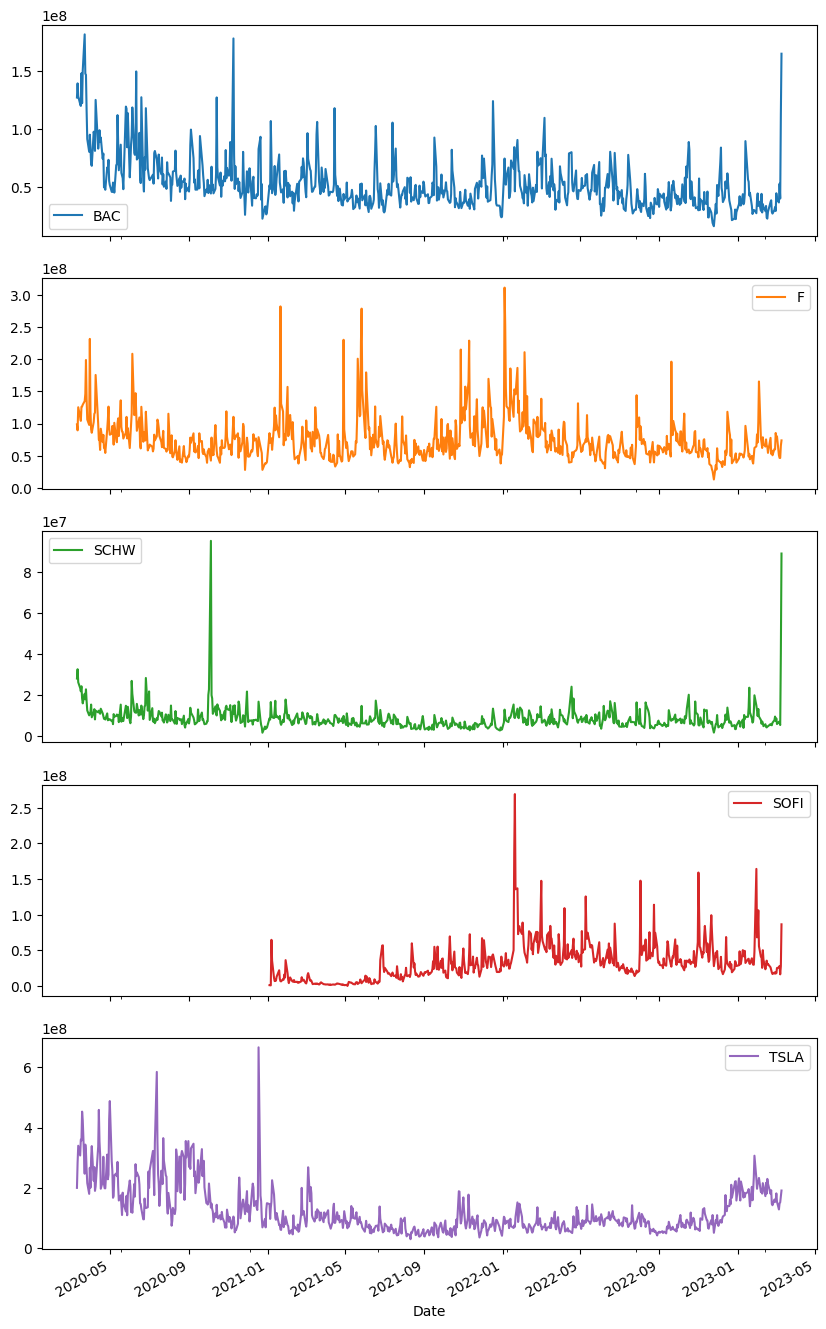

In [204]:
volume = ticker.Volume
volume

print(volume.describe())
volume.plot(subplots=True, figsize=(10,18))


In [205]:
high = ticker.High
figure = px.line(high)
figure.show()

In [206]:
#lows = ticker.Low.plot(subplots=True, figsize=(10, 18))
figure = px.line(ticker.Low)
figure.show()

In [207]:
dividends = px.area(ticker.High)
dividends.show()

In [208]:

dividend = ticker.Dividends
dividend



,BAC,F,SCHW,SOFI,TSLA
Date,,,,,
2020-03-11,0.0,0.0,0.0,NaN,0.0
2020-03-12,0.0,0.0,0.0,NaN,0.0
2020-03-13,0.0,0.0,0.0,NaN,0.0
2020-03-16,0.0,0.0,0.0,NaN,0.0
2020-03-17,0.0,0.0,0.0,NaN,0.0
...,...,...,...,...,...
2023-03-06,0.0,0.0,0.0,0.0,0.0
2023-03-07,0.0,0.0,0.0,0.0,0.0
2023-03-08,0.0,0.0,0.0,0.0,0.0


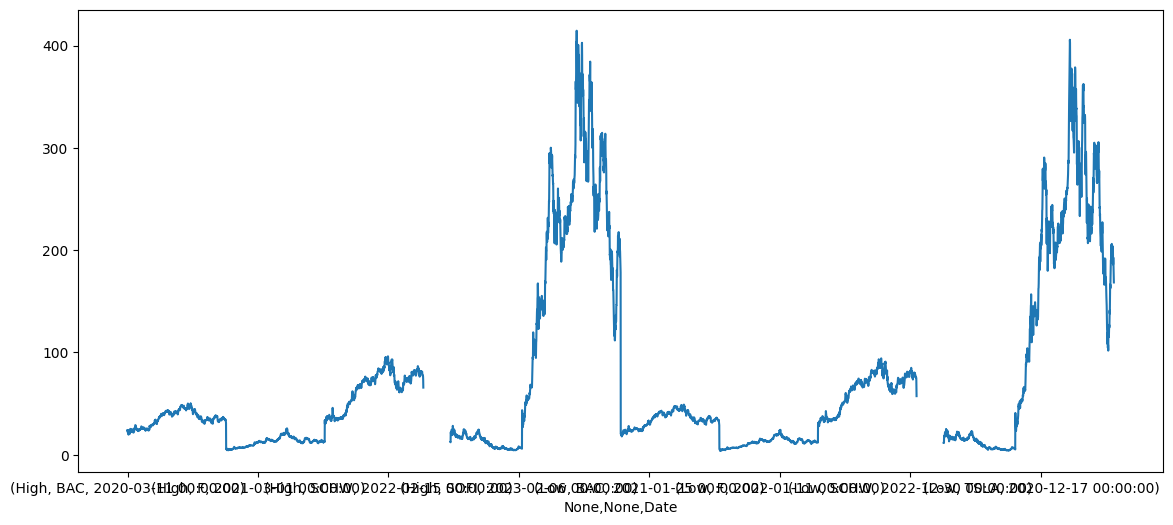

In [209]:
High_Low = ticker.loc[:, ['High', 'Low' ]]
#High_Low.plot(subplots=True, figsize=(10,10))
ax = High_Low.unstack(level=0).plot(figsize=(14,6))